In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

C:\Users\DevTarde\AppData\Local\Temp\ipykernel_16084\83083066.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


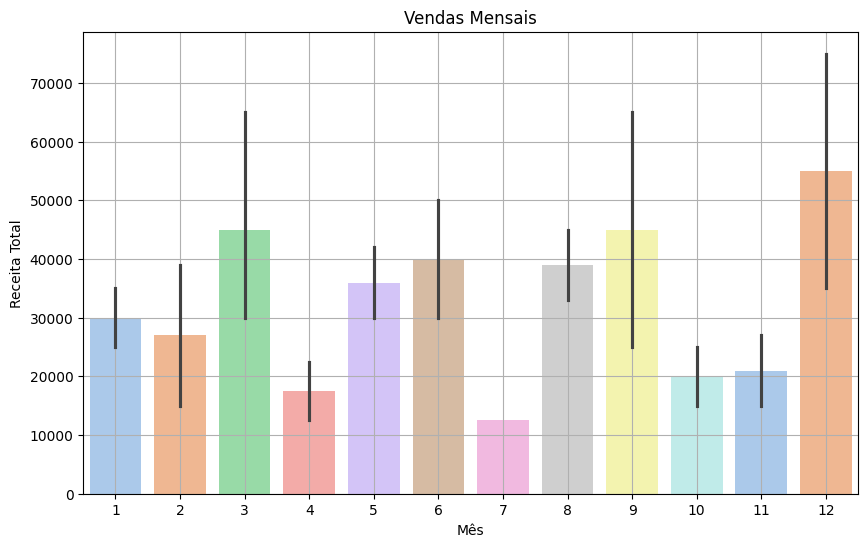

In [4]:
with open("empresa.yaml", "r") as file:
    dados = yaml.safe_load(file)

df_vendas = pd.DataFrame(dados["vendas"])
df_clientes = pd.DataFrame(dados["comportamento_do_cliente"])
df_produtos = pd.DataFrame(dados["desempenho_do_produto"])
# Leitura e Visualização Inicial:

# Converter a coluna 'data' para o tipo datetime do pandas
df_vendas["data"] = pd.to_datetime(df_vendas["data"])

# Extrair o mês da data e adicionar como uma nova coluna chamada 'mes'
df_vendas["mes"] = df_vendas["data"].dt.month

# Calcular o valor total da venda (preço unitário * quantidade) e adicionar 'valor_total'
df_vendas["valor_total_mensal"] = df_vendas["preco_unitario"] * df_vendas["quantidade"]

# Gráfico de barras para o desempenho de vendas mensais
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_vendas, x="mes", y="valor_total_mensal", palette="pastel", estimator=sum
)
plt.title("Vendas Mensais")
plt.xlabel("Mês")
plt.ylabel("Receita Total")
plt.grid(True)
plt.show()

In [5]:
print("\nEstatísticas Descritivas para as Colunas Numéricas:")
print("Estatísticas Descritivas:")
print(df_vendas.describe())
print("\nValores Ausentes:")
print(df_vendas.isnull().sum())

# Os valores nulos foram preenchidos manualmente direto na tabela por um cálculo
# (vendas_totais * preco_unitario)


Estatísticas Descritivas para as Colunas Numéricas:
Estatísticas Descritivas:
              id                 data  quantidade  preco_unitario  cliente_id  \
count  60.000000                   60   60.000000       60.000000   60.000000   
mean   30.500000  2023-06-30 12:00:00    1.833333     3500.000000  107.800000   
min     1.000000  2023-01-05 00:00:00    1.000000     2500.000000  101.000000   
25%    15.750000  2023-04-04 18:00:00    1.000000     2500.000000  104.000000   
50%    30.500000  2023-06-30 00:00:00    2.000000     3000.000000  108.000000   
75%    45.250000  2023-10-02 00:00:00    2.250000     5000.000000  112.000000   
max    60.000000  2023-12-20 00:00:00    3.000000     5000.000000  113.000000   
std    17.464249                  NaN    0.806051     1089.238577    4.111992   

             mes  valor_total_mensal  
count  60.000000           60.000000  
mean    6.500000         6466.666667  
min     1.000000         2500.000000  
25%     3.750000         3000.00000

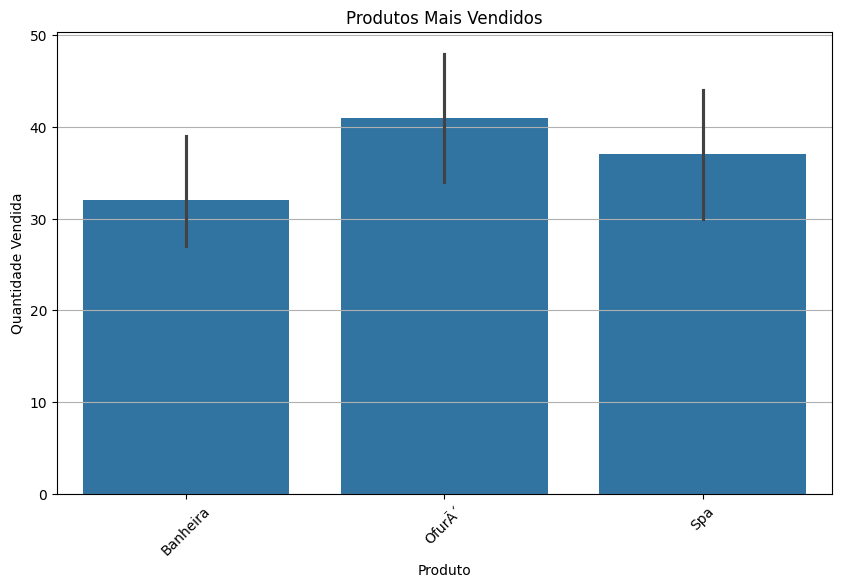

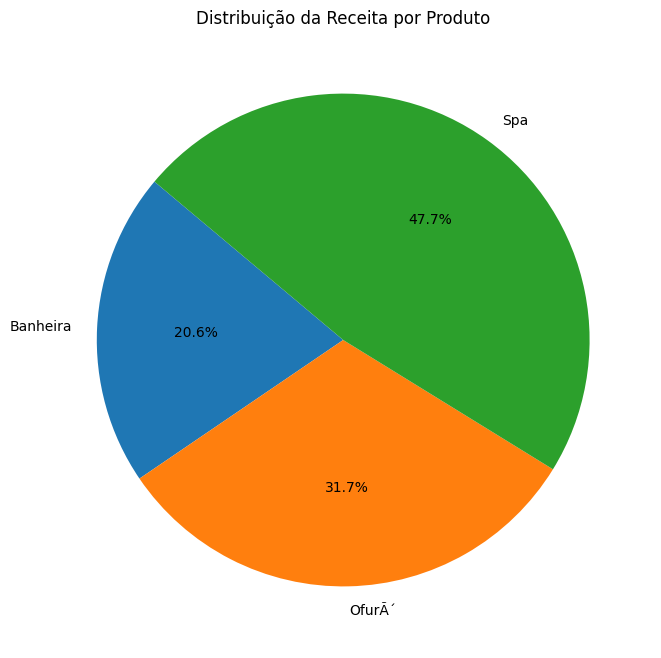

In [6]:
# Gráfico de barras dos produtos mais vendidos
plt.figure(figsize=(10, 6))
sns.barplot(x="produto", y="quantidade", data=df_vendas, estimator=sum)
plt.title("Produtos Mais Vendidos")
plt.xlabel("Produto")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Gráfico de pizza dos produtos distribuição de receita dos produtos
plt.figure(figsize=(8, 8))
plt.pie(
    df_produtos["receita_total"],
    labels=df_produtos["produto"],
    autopct="%1.1f%%",
    startangle=140,
)
plt.title("Distribuição da Receita por Produto")
plt.show()

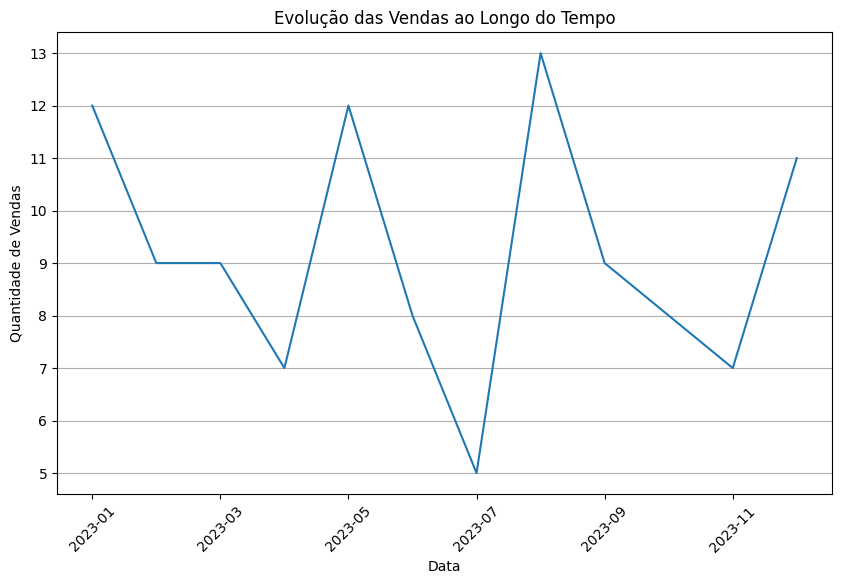

In [7]:
df_vendas["data"] = pd.to_datetime(df_vendas["data"])

# Agrupando as vendas por mês e somando as quantidades vendidas
vendas_por_mes = df_vendas.groupby(df_vendas["data"].dt.strftime("%Y-%m"))[
    "quantidade"
].sum()

# Plotando o gráfico de linha
plt.figure(figsize=(10, 6))
vendas_por_mes.plot(kind="line")
plt.xlabel("Data")
plt.ylabel("Quantidade de Vendas")
plt.title("Evolução das Vendas ao Longo do Tempo")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

cliente_id
101    25000.0
102    24000.0
103    45000.0
104    12500.0
105    27000.0
106    40000.0
107     5000.0
108    39000.0
109    45000.0
110     7500.0
111    15000.0
112    55000.0
113    48000.0
Name: valor_total, dtype: float64


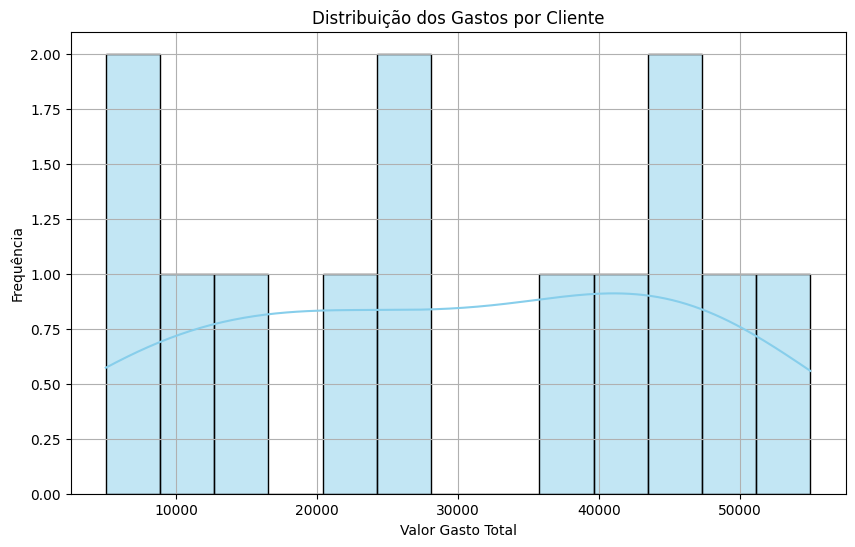

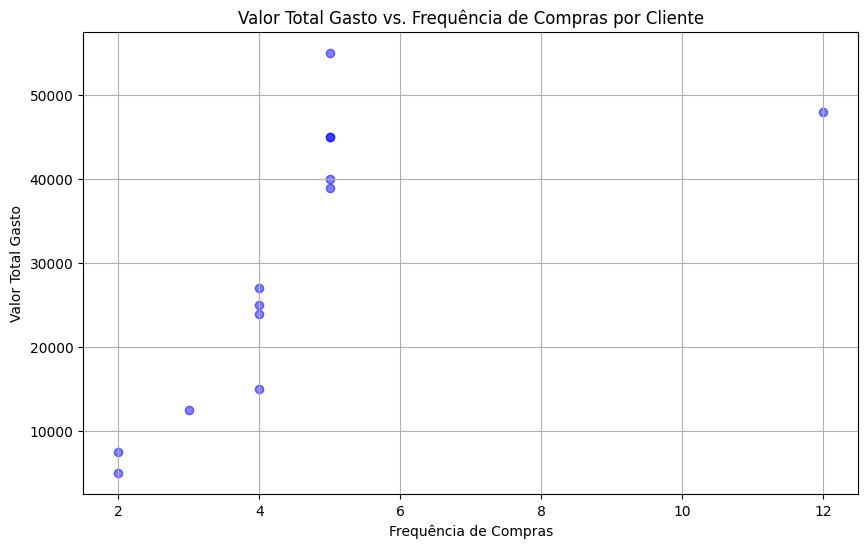

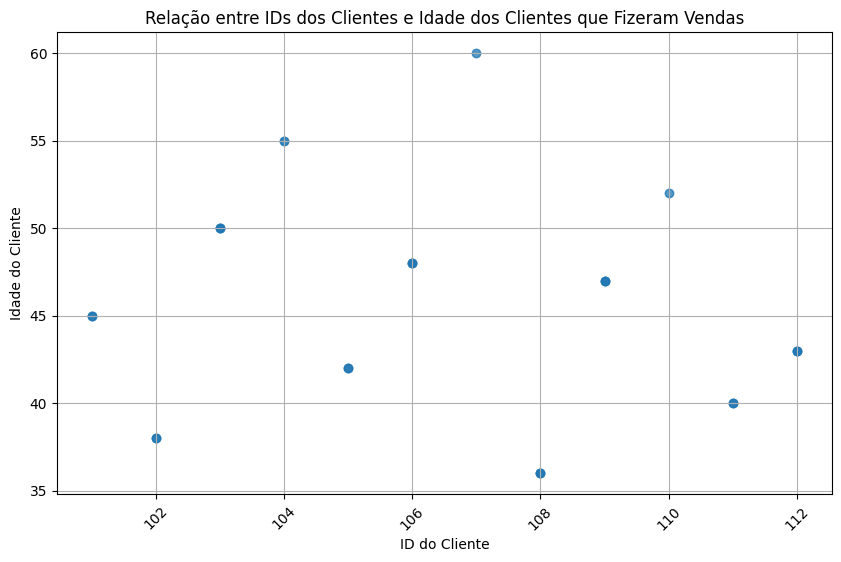

In [8]:

# Calcular o valor total de cada venda
df_vendas["valor_total"] = df_vendas["quantidade"] * df_vendas["preco_unitario"]

# Calcular o valor total gasto por cada cliente
valor_total_por_cliente = df_vendas.groupby("cliente_id")["valor_total"].sum()

# Exibir o valor total gasto por cada cliente
print(valor_total_por_cliente)

# Gráfico de histograma para a distribuição dos gastos por cliente
plt.figure(figsize=(10, 6))
sns.histplot(valor_total_por_cliente, bins=13, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribuição dos Gastos por Cliente")
plt.xlabel("Valor Gasto Total")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()


# Calcular o valor total gasto por cada cliente
valor_total_por_cliente = df_vendas.groupby("cliente_id")["valor_total"].sum()

# Calcular a frequência de compras de cada cliente
frequencia_de_compras = df_vendas["cliente_id"].value_counts()

# Criar um DataFrame com o valor total gasto e a frequência de compras de cada cliente
df_clientes_analise = pd.DataFrame({"valor_total_gasto": valor_total_por_cliente, "frequencia_de_compras": frequencia_de_compras})

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_clientes_analise["frequencia_de_compras"], df_clientes_analise["valor_total_gasto"], color='blue', alpha=0.5)
plt.title("Valor Total Gasto vs. Frequência de Compras por Cliente")
plt.xlabel("Frequência de Compras")
plt.ylabel("Valor Total Gasto")
plt.grid(True)
plt.show()


df_merged = pd.merge(
    df_vendas, df_clientes, left_on="cliente_id", right_on="id", how="left"
)

# Gráfico de dispersão para relacionar os IDs dos clientes com a idade dos clientes que fizeram vendas
plt.figure(figsize=(10, 6))
plt.scatter(df_merged["id_y"], df_merged["idade"], alpha=0.5)
plt.title("Relação entre IDs dos Clientes e Idade dos Clientes que Fizeram Vendas")
plt.xlabel("ID do Cliente")
plt.ylabel("Idade do Cliente")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Distribuição de Preços dos Produtos:


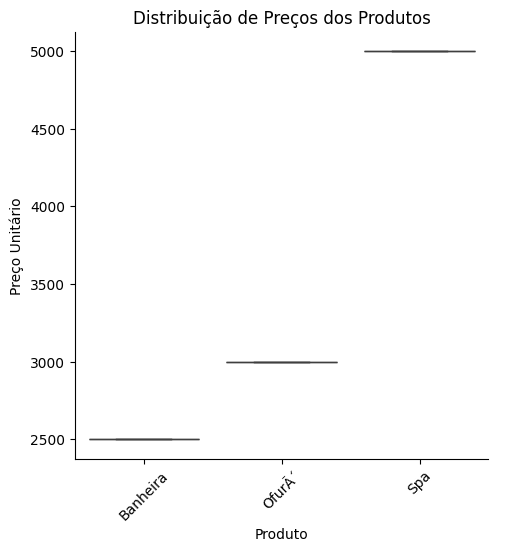

In [10]:
# Análise de Preços
print("\nDistribuição de Preços dos Produtos:")

# Gráfico de caixa da distribuição dos preços dos produtos com nomes
sns.catplot(data=df_vendas, x="produto", y="preco_unitario", kind="box")
plt.xlabel("Produto")
plt.ylabel("Preço Unitário")
plt.title("Distribuição de Preços dos Produtos")
plt.xticks(rotation=45)
plt.show()